In [ ]:

import re
import string
import time


import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification


import nltk

from nltk.tokenize import word_tokenize


nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv("final_dataset.csv")
df

,text,label
0,Phones\n\nModern humans today are always on th...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices\n\nT...,0
3,Phones & Driving\n\nDrivers should not be able...,0
4,Cell Phone Operation While Driving\n\nThe abil...,0
...,...,...
122652,There has been a fuss about the Elector Colleg...,0
122653,Limiting car usage has many advantages. Such a...,0
122654,There's a new trend that has been developing f...,0
122655,As we all know cars are a big part of our soci...,0


In [3]:
df['label'].value_counts()

label
0    69201
1    53456
Name: count, dtype: int64

label
0    69201
1    53456
Name: count, dtype: int64


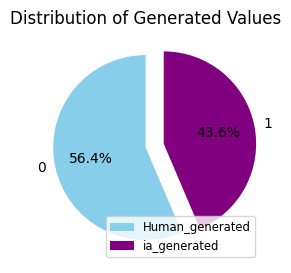

In [4]:
generated_count =df['label'].value_counts()
print(generated_count)
labels = generated_count.index
explode = (0, 0.2)
plt.figure(figsize=(3,3))
plt.pie(generated_count, labels=labels, autopct='%1.1f%%', explode=explode, startangle=90 ,colors=['skyblue', 'purple'])
plt.title('Distribution of Generated Values')
legend_labels = ['Human_generated', 'ia_generated']
plt.legend(legend_labels, loc='lower right',fontsize='small')
plt.show()

In [5]:
random_generated_data_ai = df[df['label'] == 1].sample(n=min(53456, df[df['label'] == 1].shape[0]), random_state=42)  
random_generated_data_human = df[df['label'] == 0].sample(n=min(53456, df[df['label'] == 0].shape[0]), random_state=42)  


train_essay_selected = df[['text', 'label']]  
data_train_final = pd.concat([random_generated_data_ai[['text', 'label']], random_generated_data_human[['text', 'label']]], ignore_index=True)  


df = data_train_final.sample(frac=1, random_state=42).reset_index(drop=True)  

label
0    53456
1    53456
Name: count, dtype: int64


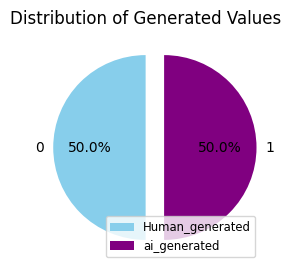

In [6]:
generated_count = df['label'].value_counts()
print(generated_count)
labels = generated_count.index
explode = (0, 0.2)
plt.figure(figsize=(3,3))
plt.pie(generated_count, labels=labels, autopct='%1.1f%%', explode=explode, startangle=90 ,colors=['skyblue', 'purple'])
plt.title('Distribution of Generated Values')
legend_labels = ['Human_generated', 'ai_generated']
plt.legend(legend_labels, loc='lower right',fontsize='small')
plt.show()

In [7]:
df

,text,label
0,"Dear TEACHER_NAME,\n\nI think that students sh...",0
1,['I found this book to be pretty decent: It is...,0
2,"Dear State Senator,\n\nI am writing to express...",1
3,"Dear, Principal\n\nHey, i just want to tell yo...",0
4,Being trapped in a situation can be like getti...,0
...,...,...
106907,"['Basically , "" fog "" is what happens when the...",0
106908,There are many advantages of having limitation...,0
106909,"Dear Principal,\n\nI think not letting student...",0
106910,"[""Canceling all the world's debt means that al...",1


In [ ]:
def clean_text(text):
    #lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove HTML artifacts
    text = re.sub(r'&[a-z]+;', ' ', text)
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Normalize whitespace 
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
df['cleaned_text'] = df['text'].apply(clean_text)
df['cleaned_text'] = df['cleaned_text'].fillna("") 

In [10]:
df

,text,label,cleaned_text
0,"Dear TEACHER_NAME,\n\nI think that students sh...",0,dear teachername i think that students should ...
1,['I found this book to be pretty decent: It is...,0,i found this book to be pretty decent it is a ...
2,"Dear State Senator,\n\nI am writing to express...",1,dear state senator i am writing to express my ...
3,"Dear, Principal\n\nHey, i just want to tell yo...",0,dear principal hey i just want to tell you tha...
4,Being trapped in a situation can be like getti...,0,being trapped in a situation can be like getti...
...,...,...,...
106907,"['Basically , "" fog "" is what happens when the...",0,basically fog is what happens when there s mor...
106908,There are many advantages of having limitation...,0,there are many advantages of having limitation...
106909,"Dear Principal,\n\nI think not letting student...",0,dear principal i think not letting students pa...
106910,"[""Canceling all the world's debt means that al...",1,canceling all the worlds debt means that all t...


In [11]:
train_val_df, test_df = train_test_split(df, test_size=0.1, stratify=df['label'], random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.1111, stratify=train_val_df['label'], random_state=42)  
print(f"Train size: {len(train_df)}, Val size: {len(val_df)}, Test size: {len(test_df)}")
print("Train class balance:\n", train_df['label'].value_counts(normalize=True))
print("Val class balance:\n", val_df['label'].value_counts(normalize=True))
print("Test class balance:\n", test_df['label'].value_counts(normalize=True))

Train size: 85529, Val size: 10691, Test size: 10692
Train class balance:
 label
1    0.500006
0    0.499994
Name: proportion, dtype: float64
Val class balance:
 label
0    0.500047
1    0.499953
Name: proportion, dtype: float64
Test class balance:
 label
0    0.5
1    0.5
Name: proportion, dtype: float64


In [12]:
train_df

,text,label,cleaned_text
40986,"[""A risk-managed momentum strategy involves id...",1,a riskmanaged momentum strategy involves ident...
66671,"Dear State Senator,\n\nI hope this letter fi...",1,dear state senator i hope this letter finds yo...
41310,"[""Nebulae are colorful because they contain a ...",1,nebulae are colorful because they contain a va...
19170,"['Ancient humans, like all animals, migrated a...",1,ancient humans like all animals migrated and s...
13353,"['Whole life insurance , in addition to having...",0,whole life insurance in addition to having the...
...,...,...,...
86912,"Working independently is a challenge, but it'...",1,working independently is a challenge but its a...
30866,[],1,
23565,The age-old debate of whether young people or ...,1,the ageold debate of whether young people or o...
71123,"[""In programming language theory, lazy evaluat...",0,in programming language theory lazy evaluation...


In [ ]:
train_df.to_csv("train_split.csv", index=False)
val_df.to_csv("val_split.csv", index=False)
test_df.to_csv("test_split.csv", index=False)

In [16]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
token_lengths = df['cleaned_text'].apply(lambda x: len(tokenizer.tokenize(x)))

print(token_lengths.describe())


print(token_lengths.value_counts().sort_index())


count    106912.000000
mean        335.475073
std         198.828468
min           0.000000
25%         200.000000
50%         302.000000
75%         422.000000
max        6172.000000
Name: cleaned_text, dtype: float64
cleaned_text
0       459
1         1
2         2
3         2
4         3
       ... 
2699      1
2805      1
2954      1
3056      1
6172      1
Name: count, Length: 1449, dtype: int64


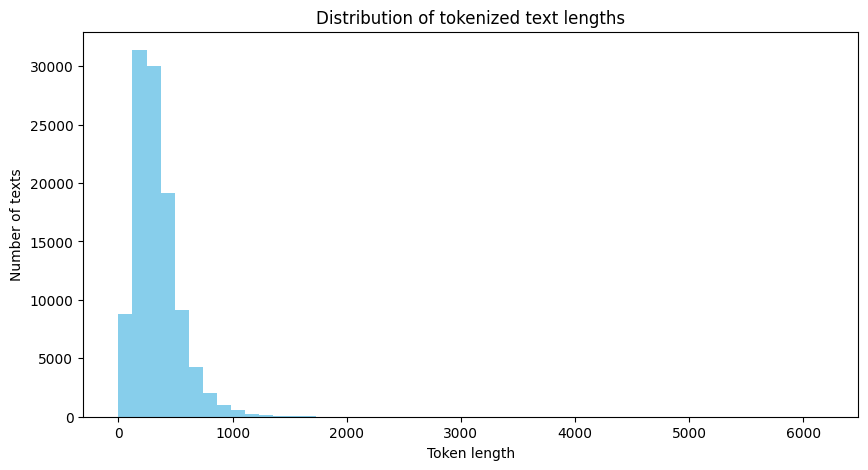

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(token_lengths, bins=50, color='skyblue')
plt.xlabel('Token length')
plt.ylabel('Number of texts')
plt.title('Distribution of tokenized text lengths')
plt.show()


In [14]:
def encode_texts(tokenizer, texts, max_length=256):

    encoding = tokenizer(  
        texts,  
        truncation=True,  
        padding='max_length',  
        max_length=max_length,  
        return_tensors='tf'  
    )  
    
    
    return {  
        'input_ids': encoding['input_ids'],  
        'attention_mask': encoding['attention_mask'],  
        'token_type_ids': encoding.get('token_type_ids', tf.zeros_like(encoding['input_ids']))  
    }  

In [ ]:
def load_and_preprocess_data(filename, tokenizer, chunksize=16, max_length=256):

    for chunk in pd.read_csv(filename, chunksize=chunksize):  
        chunk['cleaned_text'] = chunk['cleaned_text'].fillna("")  
        inputs = encode_texts(tokenizer, chunk['cleaned_text'].tolist(), max_length=max_length)  
        targets = chunk['label'].values  
        
        if len(inputs['input_ids']) == 0 or len(targets) == 0:  
            print("Warning: Empty input or target batch encountered!")  
            continue  
        
        
        yield ({'input_ids': inputs['input_ids'],   
                'attention_mask': inputs['attention_mask'],   
                'token_type_ids': inputs['token_type_ids']},   
               targets) 

In [ ]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import AdamWeightDecay 
optimizer = AdamWeightDecay(learning_rate=2e-5)  

 
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)  

 
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])  

In [21]:
train_gen = load_and_preprocess_data('train_split.csv', tokenizer)
val_gen = load_and_preprocess_data('val_split.csv', tokenizer)

In [22]:
try:  
    inputs, targets = next(train_gen)  # Get a batch to test  
    print("Example Input IDs:", inputs['input_ids'])  
    print("Example Attention Masks:", inputs['attention_mask'])  
    print("Example Targets:", targets)  
except StopIteration:  
    print("Caught StopIteration - likely no data in generator.")  
except Exception as e:  
    print(f"Error while testing the generator: {e}")  

Example Input IDs: tf.Tensor(
[[  101  1037  3891 ...     0     0     0]
 [  101  6203  2110 ...  7206  2408   102]
 [  101 25677  2063 ...     0     0     0]
 ...
 [  101  3097 15768 ...  2026  2769   102]
 [  101  1999  1996 ...     0     0     0]
 [  101  1045  2387 ...     0     0     0]], shape=(16, 256), dtype=int32)
Example Attention Masks: tf.Tensor(
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]], shape=(16, 256), dtype=int32)
Example Targets: [1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0]


In [23]:
start_time = time.time()

In [ ]:
try:  
    history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=3,                 
    steps_per_epoch=100,      
    validation_steps=50,      
    verbose=1
    )

   
    train_accuracy = history.history['accuracy'][-1]  
    val_accuracy = history.history['val_accuracy'][-1]  

    print(f"Training Accuracy: {train_accuracy:.4f}")  
    print(f"Validation Accuracy: {val_accuracy:.4f}")  

except Exception as e:  
    print(f"Error during model fitting: {e}")  

Epoch 1/3


100/100 [==============================] - 577s 6s/step - loss: 0.3654 - accuracy: 0.8525 - val_loss: 0.6453 - val_accuracy: 0.6975
Epoch 2/3
100/100 [==============================] - 574s 6s/step - loss: 0.1690 - accuracy: 0.9444 - val_loss: 0.0903 - val_accuracy: 0.9775
Epoch 3/3
100/100 [==============================] - 564s 6s/step - loss: 0.0936 - accuracy: 0.9712 - val_loss: 0.0676 - val_accuracy: 0.9750
Training Accuracy: 0.9712
Validation Accuracy: 0.9750


In [ ]:
# Recording the end time
end_time = time.time()

training_duration = end_time - start_time
print(f"Training completed in {training_duration} seconds")

Training completed in 2829.3621637821198 seconds


In [35]:
model.save_pretrained('final_bertCopy_model')
tokenizer.save_pretrained('final_bertCopy_tokenizer')

('final_bertCopy_tokenizer\\tokenizer_config.json',
 'final_bertCopy_tokenizer\\special_tokens_map.json',
 'final_bertCopy_tokenizer\\vocab.txt',
 'final_bertCopy_tokenizer\\added_tokens.json')

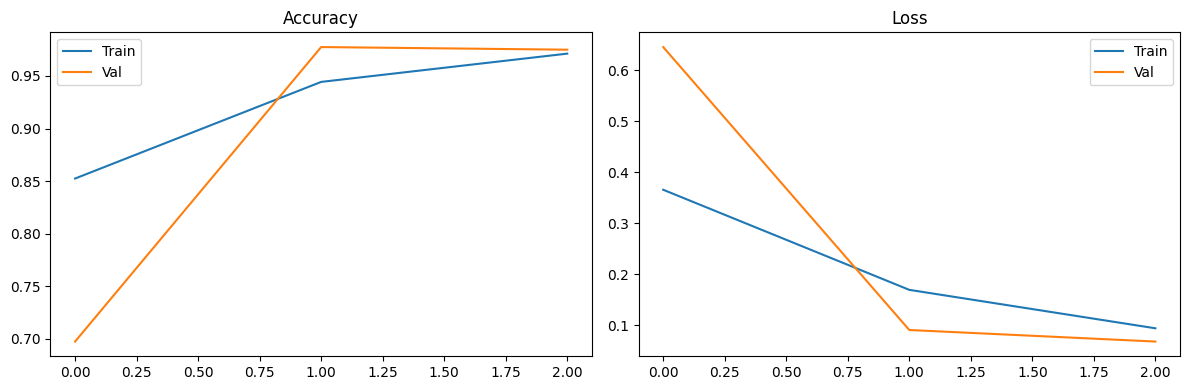

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
def plot_training(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training(history)

In [29]:
test_dataset = load_and_preprocess_data('test_split.csv', tokenizer)
test_loss, test_accuracy = model.evaluate(test_dataset, steps=50)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


50/50 [==============================] - 90s 2s/step - loss: 0.0835 - accuracy: 0.9712
Test Loss: 0.0835
Test Accuracy: 0.9712



Classification Report:

              precision    recall  f1-score   support

       Human       0.97      0.97      0.97       397
          AI       0.97      0.98      0.97       403

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800

Confusion Matrix:


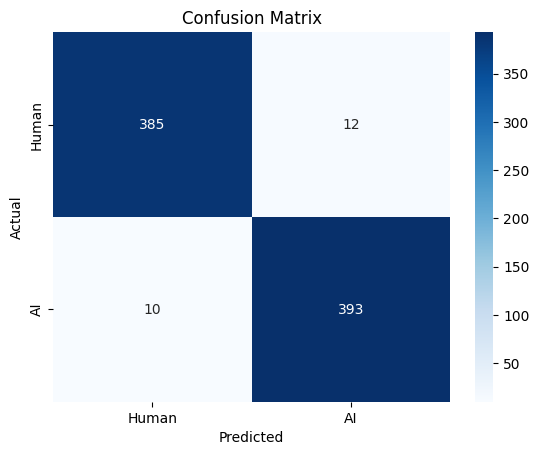

In [ ]:
y_true = []
y_pred = []

for i, (inputs, labels) in enumerate(test_dataset):
    if i >= 50: 
        break
    logits = model.predict(inputs, verbose=0).logits
    preds = np.argmax(logits, axis=1)

    y_true.extend(labels)
    y_pred.extend(preds)

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

#Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=['Human', 'AI']))

#Confusion Matrix

print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Human", "AI"], yticklabels=["Human", "AI"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import numpy as np
import tensorflow as tf

tokenizer = BertTokenizer.from_pretrained('final_bertCopy_tokenizer')
model = TFBertForSequenceClassification.from_pretrained('final_bertCopy_model')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at final_bertCopy_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [19]:
def predict_example(text, tokenizer, model, max_length=256):
    inputs = encode_texts(tokenizer, [text], max_length=max_length)
    predictions = model.predict(inputs)
    # Print raw logits or probabilities
    print(predictions.logits)
    predicted_class = np.argmax(predictions.logits, axis=1)[0]
    return "AI-generated" if predicted_class == 1 else "Human-written"

In [20]:
# Making predictions

# human 
example_text_1 ="Most of the island is under a special weather statement with a prolonged period of snow in the forecast for much of western and central Newfoundland, along the northeast coast and onto the northern Avalon Peninsula."

#ChatGPT:
example_text_2 = "Artificial intelligence is advancing rapidly, but human creativity and empathy remain unmatched in understanding complex emotions."

#ChatGPT:
example_text_3 ="Art, in its many forms, reflects not just individual expression but the collective consciousness of a society."

# human 
example_text_4 = """Psychology is so all-pervasive and so important that it 
enters into our every thought and action; by definition 
almost, the facts and theories of psychology are 
central to our mental and physical activities. Psy
chology, clearly, is about us if it is about anything: 
our behaviour, our minds, our emotions, our 
intelligence, our crimes and mental disorders, our 
problems. This means that ever since human being, 
came to the fore in the evolutionary struggle, they 
have concerned them,elves with psychological 
questions. Some of these questions are philosophical 
in nature-Who are we? Why are we here? How did 
~e come to be the way we are? Why do we differ so 
profoundly from each other? Other questions have a 
more practical turn-How can we make other people 
do what we want them to do? Who is best suited for 
this or that position? Will she be a good wife for me? 
Is he trustworthy? Psychology i, still split into a pure 
and an applied section, although this differentiation 
tends to get more and more blurred. In any case, 
psychology has a long past; but it ha, a very short 
history. The history of psychology as a science is just 
about 100 years long; it was only in 1879 that 
Wilhelm Wundt founded the first formal psycho
logical laboratory in Leipzig. Its growth has been very 
rapid since those early days, but it is still very young 
in comparison with long-established sciences like 
physics, or chemistry. Both past and history have 
been reviewed in great detail, and with many fascinat
ing details about the many famous people who 
contributed to them, by Boring (1950); the History of 
Experimental Psychology presents an excellent account of how psychology grew to its present stature."""



texth="""Psychology is so all-pervasive and so important that it 
enters into our every thought and action; by definition 
almost, the facts and theories of psychology are 
central to our mental and physical activities. Psy
chology, clearly, is about us if it is about anything: 
our behaviour, our minds, our emotions, our 
intelligence, our crimes and mental disorders, our 
problems. This means that ever since human being, 
came to the fore in the evolutionary struggle, they 
have concerned them,elves with psychological 
questions. Some of these questions are philosophical 
in nature-Who are we? Why are we here? How did 
~e come to be the way we are? Why do we differ so 
profoundly from each other? Other questions have a 
more practical turn-How can we make other people 
do what we want them to do? Who is best suited for 
this or that position? Will she be a good wife for me? 
Is he trustworthy? Psychology i, still split into a pure 
and an applied section, although this differentiation 
tends to get more and more blurred. In any case, 
psychology has a long past; but it ha, a very short 
history. The history of psychology as a science is just 
about 100 years long; it was only in 1879 that 
Wilhelm Wundt founded the first formal psycho
logical laboratory in Leipzig. Its growth has been very 
rapid since those early days, but it is still very young 
in comparison with long-established sciences like 
physics, or chemistry. Both past and history have 
been reviewed in great detail, and with many fascinat
ing details about the many famous people who 
contributed to them, by Boring (1950); the History of 
Experimental Psychology presents an excellent account of how psychology grew to its present stature."""

text = """NASA's most recent Mars rover expedition stands as a testament to humanity's unyielding quest for knowledge and exploration. The mission, dubbed "Red Horizon," marks a milestone in space exploration, showcasing cutting-edge technology and scientific ingenuity.

At the heart of this expedition lies the Perseverance rover, a marvel of engineering designed to unravel the mysteries of the Martian surface. Equipped with an array of state-of-the-art instruments, Perseverance aims to characterize the geology of Mars, search for signs of past microbial life, and pave the way for future human exploration.

One of the key objectives of the mission is to collect samples of Martian rocks and soil for eventual return to Earth. This ambitious endeavor involves sophisticated sample caching mechanisms and collaboration with future missions to retrieve these precious specimens, offering scientists unprecedented insights into the Red Planet's history and evolution.

Furthermore, Perseverance carries onboard the Ingenuity helicopter, a technological marvel that promises to revolutionize planetary exploration. Ingenuity's successful flight tests demonstrate the viability of aerial reconnaissance on Mars, opening up new avenues for scouting potential landing sites and conducting detailed surveys of the Martian terrain.

In addition to its scientific goals, the Red Horizon mission exemplifies international cooperation, with contributions from various space agencies and research institutions around the globe. This collaborative spirit underscores humanity's collective endeavor to unravel the mysteries of the cosmos and expand the boundaries of human knowledge.

As the Perseverance rover continues its journey across the Martian landscape, each new discovery serves as a reminder of the boundless potential of human exploration. From its innovative technology to its groundbreaking scientific discoveries, NASA's latest Mars rover expedition reaffirms our commitment to pushing the boundaries of what is possible and inspires generations to come to reach for the stars."""
prediction_1 = predict_example(example_text_1, tokenizer, model)
prediction_2 = predict_example(example_text_2, tokenizer, model)
prediction_3 = predict_example(example_text_3, tokenizer, model)
prediction_4 = predict_example(example_text_4, tokenizer, model)
prediction_5 = predict_example(text, tokenizer, model)
prediction_6 = predict_example(texth, tokenizer, model)
print(f"Example Text 1 Prediction: {prediction_1}")
print(f"Example Text 2 Prediction: {prediction_2}")
print(f"Example Text 3 Prediction: {prediction_3}")
print(f"Example Text 4 Prediction: {prediction_4}")
print(f"Example Text 3 Prediction: {prediction_5}")
print(f"Example Text 4 Prediction: {prediction_6}")

1/1 [==============================] - 4s 4s/step
[[ 0.55613434 -0.6421807 ]]
1/1 [==============================] - 0s 141ms/step
[[-1.793749  1.841518]]
1/1 [==============================] - 0s 142ms/step
[[-1.2998152  1.4450356]]
1/1 [==============================] - 0s 142ms/step
[[ 1.5047069 -1.207619 ]]
1/1 [==============================] - 0s 140ms/step
[[-1.8257722  1.7410097]]
1/1 [==============================] - 0s 155ms/step
[[ 1.5047069 -1.207619 ]]
Example Text 1 Prediction: Human-written
Example Text 2 Prediction: AI-generated
Example Text 3 Prediction: AI-generated
Example Text 4 Prediction: Human-written
Example Text 3 Prediction: AI-generated
Example Text 4 Prediction: Human-written


In [21]:
example_text_11 ="Most of the island is under a special weather statement with a prolonged period of snow in the forecast for much of western and central Newfoundland, along the northeast coast and onto the northern Avalon Peninsula."

#Text2 generated by ChatGPT:
example_text_12 = "Artificial intelligence is advancing rapidly, but human creativity and empathy remain unmatched in understanding complex emotions."

#Text3 generated by ChatGPT:
example_text_13 = "While AI excels in data analysis, human intuition and adaptability are crucial for navigating unpredictable situations."

#Text4 from the Internet written by human retrieved from https://michiganlawreview.org/journal/a-mystifying-and-distorting-factor-the-electoral-college-and-american-democracy/
example_text_14 ="This Committee returned with a draft that created a unitary president who would serve a four-year term and be eligible for reelection. But, importantly, that executive would not be popularly elected; rather, he would be chosen by special “electors,” appointed in each state in a manner chosen by the state legislature—an idea Wilson had floated several times previously. Each state’s elector allocation would match its seats in Congress (House and Senate combined), thus importing into presidential selection the same advantage that small states and slave states enjoyed in congressional representation. This new proposal was adopted nearly unanimously with only one small modification: giving the House (with states voting by delegation) rather than the Senate the power to resolve elections in which no candidate received a majority (pp. 74–75, 79)."


prediction_11 = predict_example(example_text_11, tokenizer, model)
prediction_12 = predict_example(example_text_12, tokenizer, model)
prediction_13 = predict_example(example_text_13, tokenizer, model)
prediction_14 = predict_example(example_text_14, tokenizer, model)

print(f"Example Text 1 Prediction: {prediction_11}")
print(f"Example Text 2 Prediction: {prediction_12}")
print(f"Example Text 3 Prediction: {prediction_13}")
print(f"Example Text 4 Prediction: {prediction_14}")

1/1 [==============================] - 0s 152ms/step
[[ 0.55613434 -0.6421807 ]]
1/1 [==============================] - 0s 153ms/step
[[-1.793749  1.841518]]
1/1 [==============================] - 0s 147ms/step
[[-1.5640389  1.6210364]]
1/1 [==============================] - 0s 141ms/step
[[0.2957088  0.24827452]]
Example Text 1 Prediction: Human-written
Example Text 2 Prediction: AI-generated
Example Text 3 Prediction: AI-generated
Example Text 4 Prediction: Human-written
